In [194]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf 
from scipy import stats

In [225]:
df = pd.read_csv('officers_only.csv', low_memory=False)
df = df[df['sustained'] == 1]

<AxesSubplot:xlabel='salary', ylabel='disciplined'>

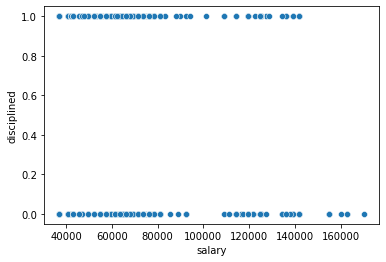

In [226]:
#df['_binned'] = pd.qcut(df['race'], q=5, labels=False)
sns.scatterplot(data=df, y='disciplined', x='salary')

[Text(0, 0, 'Supervisory Responsibilities'),
 Text(1, 0, 'Criminal Misconduct'),
 Text(2, 0, 'Operation/Personnel Violations'),
 Text(3, 0, 'Traffic'),
 Text(4, 0, 'Verbal Abuse'),
 Text(5, 0, 'Lockup Procedures'),
 Text(6, 0, 'Domestic'),
 Text(7, 0, 'Conduct Unbecoming (Off-duty)'),
 Text(8, 0, 'Use of Force'),
 Text(9, 0, 'False Arrest'),
 Text(10, 0, 'Illegal Search'),
 Text(11, 0, 'Drug / Alcohol Abuse'),
 Text(12, 0, 'Bribery / Official Corruption'),
 Text(13, 0, 'Other')]

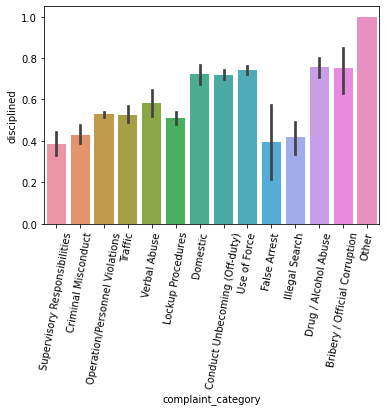

In [227]:
#df['_binned'] = pd.qcut(df['race'], q=5, labels=False)
ax = sns.barplot(data=df, y='disciplined', x='complaint_category')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)

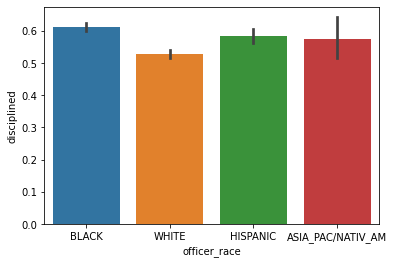

In [237]:
ax = sns.barplot(data=df, y='disciplined', x='officer_race')

In [236]:
df[df['complaint_descr'] == 'MISCELLANEOUS']['complaint_category'].value_counts()

Operation/Personnel Violations    573
Conduct Unbecoming (Off-duty)     381
Use of Force                      159
Criminal Misconduct                68
Supervisory Responsibilities       51
Traffic                            31
Illegal Search                     28
Lockup Procedures                  26
Verbal Abuse                       12
Bribery / Official Corruption      12
Drug / Alcohol Abuse               12
Domestic                            1
Name: complaint_category, dtype: int64

In [229]:
df['complaint_category'].value_counts()

Operation/Personnel Violations    7952
Use of Force                      1564
Conduct Unbecoming (Off-duty)     1494
Lockup Procedures                 1293
Traffic                            588
Criminal Misconduct                459
Domestic                           390
Drug / Alcohol Abuse               322
Supervisory Responsibilities       262
Verbal Abuse                       238
Illegal Search                     146
Bribery / Official Corruption       60
False Arrest                        28
Other                                1
Name: complaint_category, dtype: int64

In [219]:
dummy_df = pd.get_dummies(df[['complaint_category', 'rank', 'employee_status', 'age_at_hire', 'officer_gender']], prefix='dummy')
dummy_df.columns = dummy_df.columns.str.replace(' ', '_')

df = pd.concat([df, dummy_df], axis=1)
df.head()

,Unnamed: 0,UID,complaint_descr,complaint_code,cr_id,cv,final_finding,final_outcome,link_UID,disciplined,...,dummy_PO_AS_DETECTIVE,dummy_POLICE_OTHER,dummy_SERGEANT,dummy_CAREER_SERVICE,dummy_EXEMPT_BY_ORDINANCE,dummy_EXEMPT_CONFIDENTIAL,dummy_PROBATIONARY_CAREER_SERVICE,dummy_SENIOR_EXECUTIVE_SERVICE,dummy_FEMALE,dummy_MALE
4,8,110583.0,COMMISSION OF CRIME: MISCELLANEOUS,08N,C188852,1,SU,SUSTAINED-NO PENALTY,30048.0,0,...,0,0,1,1,0,0,0,0,0,1
5,10,110583.0,OPERATION/PERSONNEL VIOLATION: MISCELLANEOUS,10Z,C202366,1,SU,Reprimand,30048.0,0,...,0,0,1,1,0,0,0,0,0,1
13,26,110583.0,SUPERVISOR RESPONSIBILITY: PROPER DIRECTION -...,12B,C158787,1,SU,Reprimand,30048.0,0,...,0,0,1,1,0,0,0,0,0,1
25,138,124462.0,SUPERVISOR RESPONSIBILITY: FAIL TO OBTAIN COM...,12D,C177882,1,SU,Reprimand,22519.0,0,...,0,0,1,1,0,0,0,0,0,1
27,162,117918.0,SUPERVISOR RESPONSIBILITY: FAIL TO OBTAIN COM...,12D,C180161,1,SU,Reprimand,22860.0,0,...,0,0,1,1,0,0,0,0,0,1


In [220]:
df.shape

(12632, 62)

In [240]:
logit_model = smf.logit(formula = "disciplined~complaint_category+officer_race+on_off_duty", data = df).fit()
logit_model.summary()

         Current function value: 0.658476
         Iterations: 35


/Users/alexolmeta/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            disciplined   No. Observations:                14785
Model:                          Logit   Df Residuals:                    14767
Method:                           MLE   Df Model:                           17
Date:                Wed, 01 Mar 2023   Pseudo R-squ.:                 0.03512
Time:                        10:00:27   Log-Likelihood:                -9735.6
converged:                      False   LL-Null:                       -10090.
Covariance Type:            nonrobust   LLR p-value:                1.165e-139
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Intercept                                                0.9214      0.343      2.683      0.007       0.248       1.594
complaint_category[T.Conduct Unbecoming (Off-duty)]      0.0159      0.323      0.049      0.961      -0.617       0.649
complaint_category[T.Criminal Misconduct]               -1.4278      0.314     -4.554      0.000      -2.042      -0.813
complaint_category[T.Domestic]                          -0.1953      0.320     -0.611      0.541      -0.822       0.431
complaint_category[T.Drug / Alcohol Abuse]               0.2168      0.335      0.647      0.518      -0.440       0.874
complaint_category[T.False Arrest]                      -1.5243      0.490     -3.111      0.002      -2.485      -0.564
complaint_category[T.Illegal Search]                    -1.4161      0.343     -4.129      0.000      -2.088      -0.744
complaint_category[T.Lockup Procedures]                 -1.0629      0.304     -3.496      0.000      -1.659      -0.467
complaint_category[T.Operation/Personnel Violations]    -1.0240      0.300     -3.416      0.001      -1.611      -0.436
complaint_category[T.Other]                             22.0037   1.15e+05      0.000      1.000   -2.25e+05    2.25e+05
complaint_category[T.Supervisory Responsibilities]      -1.5309      0.325     -4.712      0.000      -2.168      -0.894
complaint_category[T.Traffic]                           -0.9835      0.310     -3.171      0.002      -1.591      -0.376
complaint_category[T.Use of Force]                       0.0635      0.309      0.205      0.837      -0.543       0.670
complaint_category[T.Verbal Abuse]                      -0.7437      0.327     -2.276      0.023      -1.384      -0.103
officer_race[T.BLACK]                                    0.1651      0.136      1.211      0.226      -0.102       0.432
officer_race[T.HISPANIC]                                 0.0008      0.142      0.006      0.995      -0.277       0.278
officer_race[T.WHITE]                                   -0.1955      0.136     -1.434      0.152      -0.463       0.072
on_off_duty[T.ON]                                        0.2103      0.108      1.954      0.051      -0.001       0.421
========================================================================================================================
"""

Classification accuracy = 59.6%


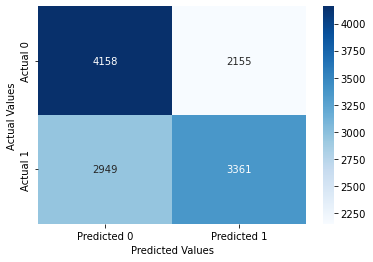

In [193]:
def confusion_matrix_train(model,cutoff=0.5):
    # Confusion matrix
    cm_df = pd.DataFrame(model.pred_table(threshold = cutoff))
    #Formatting the confusion matrix
    cm_df.columns = ['Predicted 0', 'Predicted 1'] 
    cm_df = cm_df.rename(index={0: 'Actual 0',1: 'Actual 1'})
    cm = np.array(cm_df)
    # Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    
confusion_matrix_train(logit_model)

In [233]:
df.corr()

/var/folders/8x/j868ltjn1wjg33ylnmh2ltb00000gn/T/ipykernel_2025/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,UID,cv,link_UID,disciplined,sustained,salary,age_at_hire,officer_age,current_status,current_unit,old_UID
Unnamed: 0,1.000000,-0.004129,0.230071,0.034362,-0.059564,NaN,-0.348852,0.151736,-0.229858,0.166626,-0.087152,0.034362
UID,-0.004129,1.000000,-0.021629,0.014600,-0.001288,NaN,0.033370,-0.032467,0.016729,-0.014118,-0.003115,0.014600
cv,0.230071,-0.021629,1.000000,0.015403,-0.042754,NaN,-0.370392,0.008021,-0.408718,0.258697,-0.127344,0.015403
link_UID,0.034362,0.014600,0.015403,1.000000,-0.006842,NaN,0.002058,0.013276,0.002407,-0.002303,0.007117,1.000000
disciplined,-0.059564,-0.001288,-0.042754,-0.006842,1.000000,NaN,-0.027765,-0.016387,-0.019422,0.049839,0.004475,-0.006842
sustained,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,-0.348852,0.033370,-0.370392,0.002058,-0.027765,NaN,1.000000,-0.074357,0.599256,-0.379380,0.160648,0.002058
age_at_hire,0.151736,-0.032467,0.008021,0.013276,-0.016387,NaN,-0.074357,1.000000,0.474838,-0.218655,-0.076038,0.013276
officer_age,-0.229858,0.016729,-0.408718,0.002407,-0.019422,NaN,0.599256,0.474838,1.000000,-0.618788,0.092277,0.002407
current_status,0.166626,-0.014118,0.258697,-0.002303,0.049839,NaN,-0.379380,-0.218655,-0.618788,1.000000,-0.013830,-0.002303


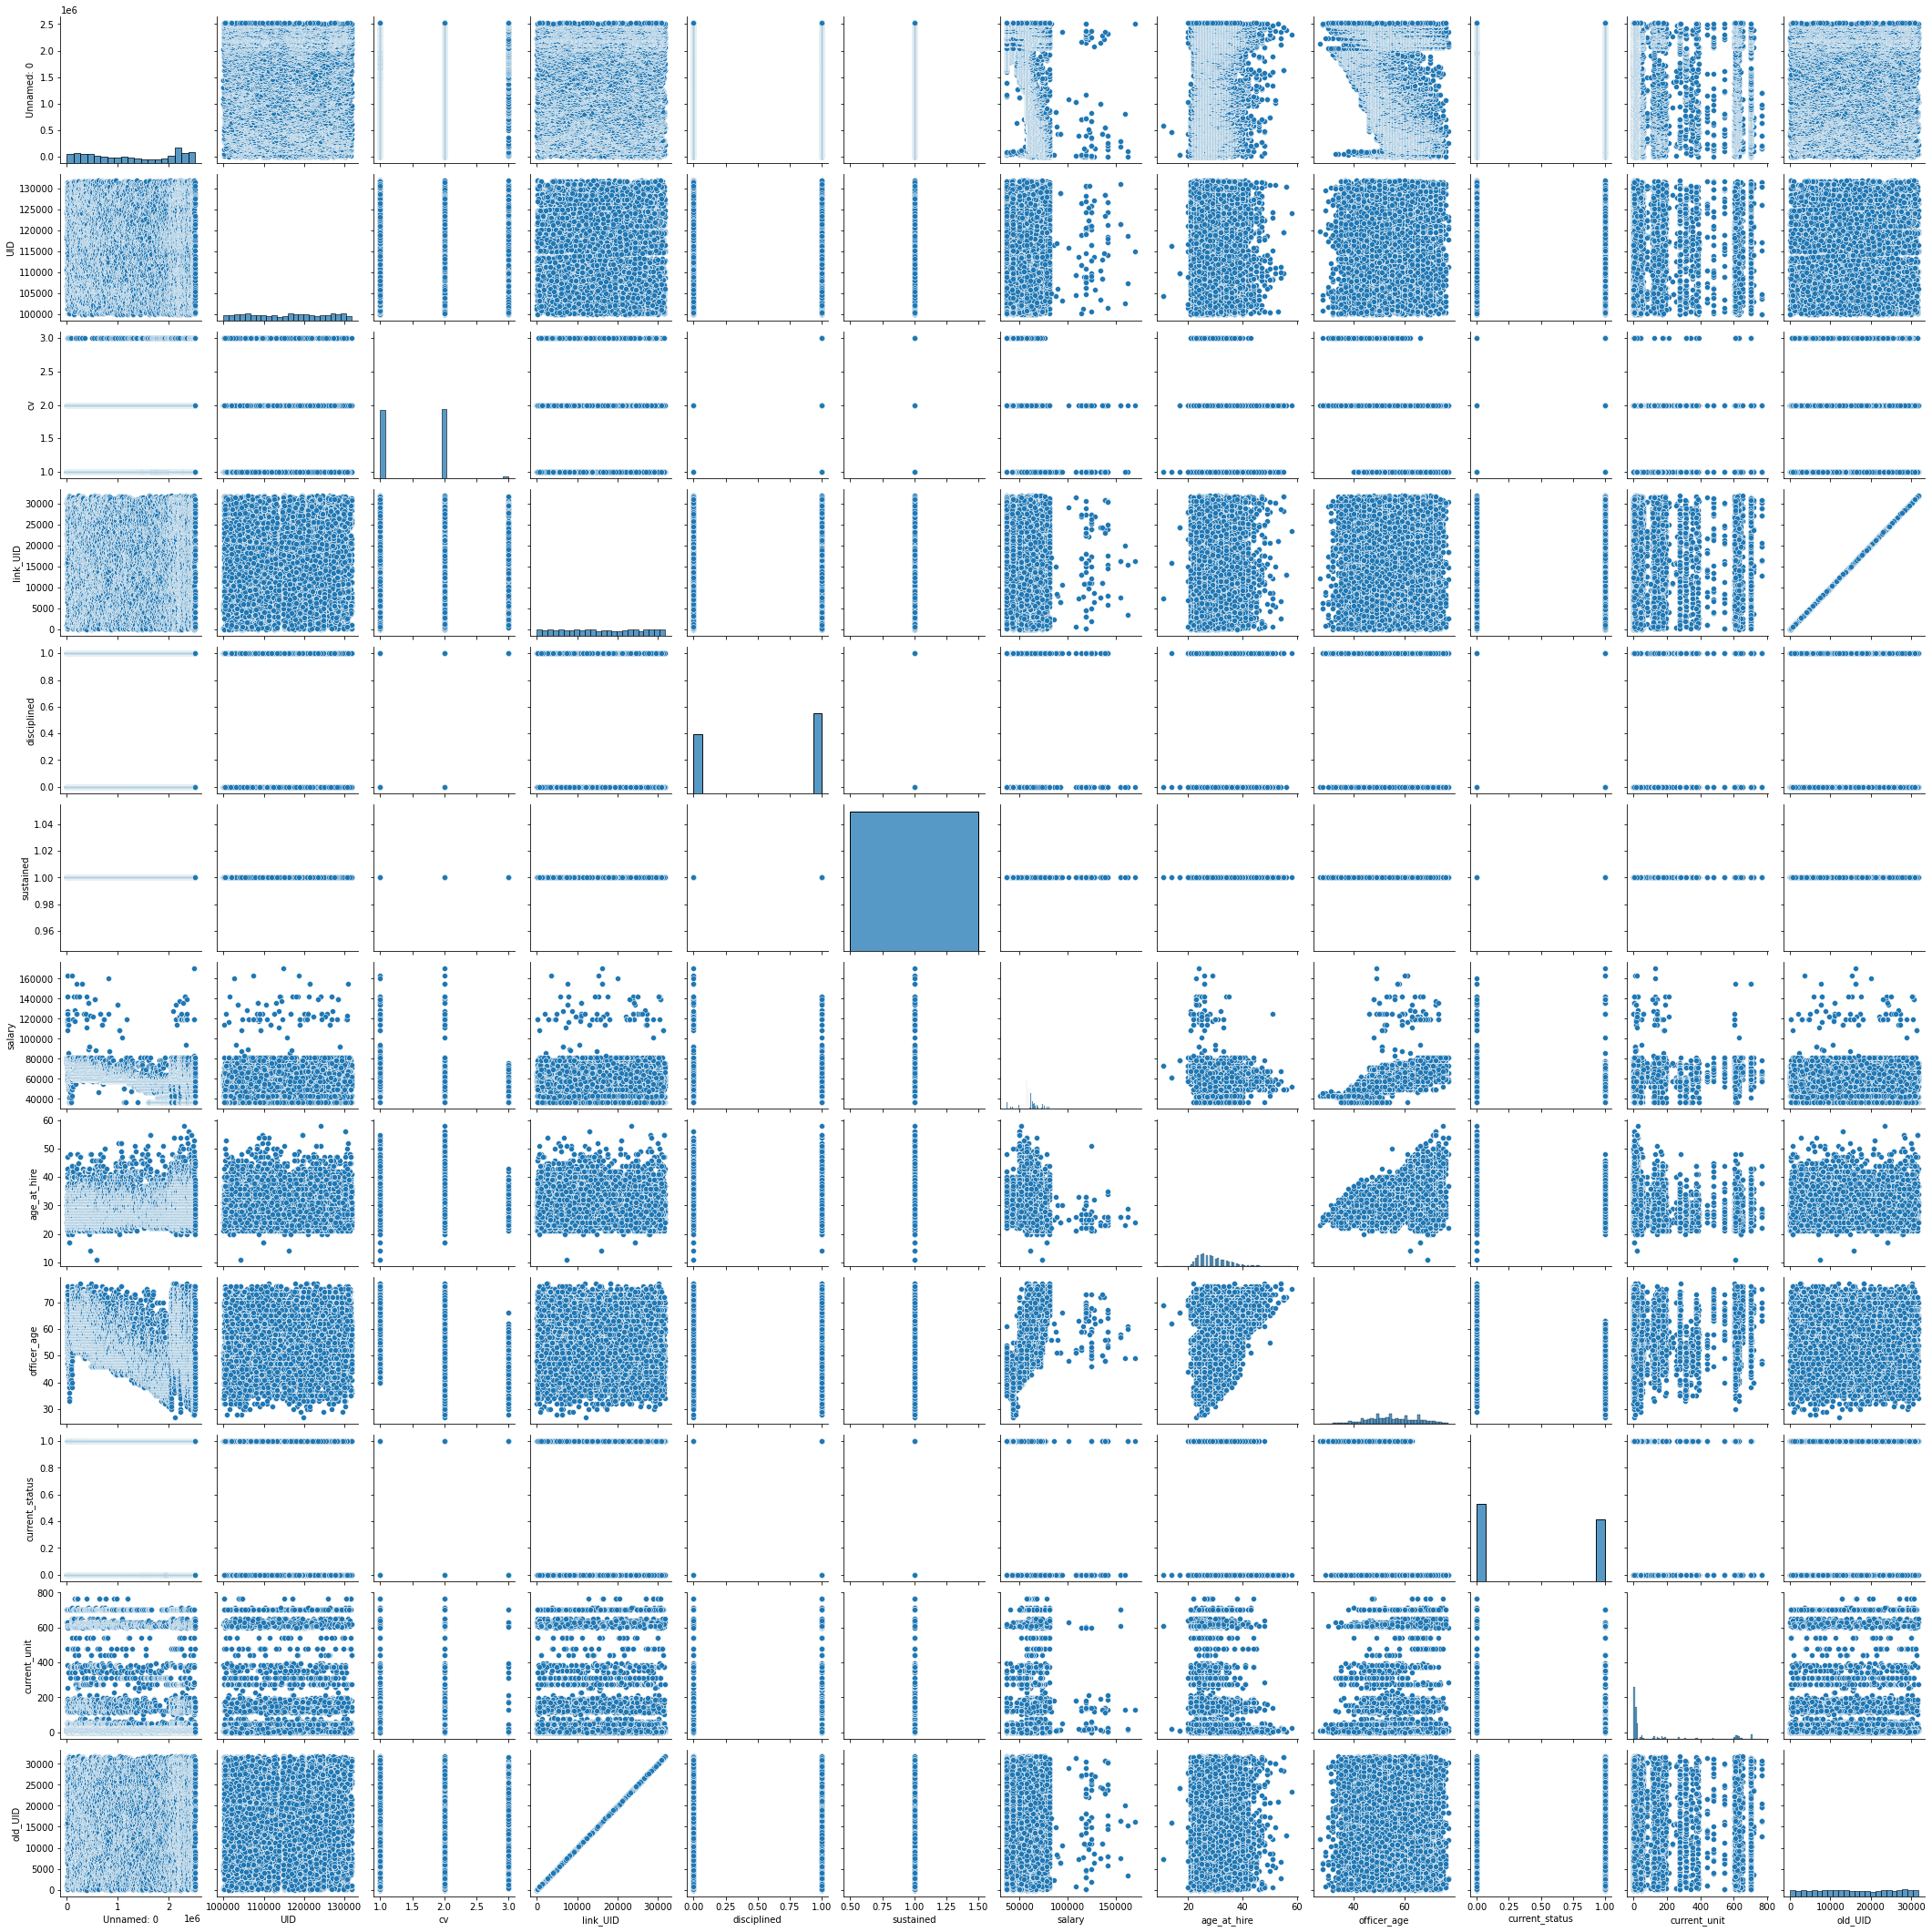

In [238]:
sns.pairplot(data=df)